In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import pandas as pd
import textwrap

In [3]:
BLINK = pd.read_csv(r'C:\Users\Brent\Desktop\ClassNotes\CSS844\Project1\GWAS2_Blink_Significant_Traits_by_Chromosome.csv')

In [5]:
print(BLINK)

    Unnamed: 0           SNP  Chr        Pos       P.value       MAF  \
0        13582   S1_39070084    1   39070084  2.350000e-07  0.252508   
1        21181   S1_66663323    1   66663323  2.430000e-07  0.091973   
2        28885  S1_282439589    1  282439589  2.180000e-08  0.100334   
3        22598   S2_44164866    2   44164866  5.110000e-08  0.455686   
4         1069   S2_44164866    2   44164866  1.350000e-06  0.455686   
..         ...           ...  ...        ...           ...       ...   
60       25995  S9_103652471    9  103652471  2.310000e-09  0.329431   
61       31832  S9_103652471    9  103652471  2.150000e-07  0.329431   
62      279691  S9_141427466    9  141427466  2.380000e-08  0.124582   
63      162731  S9_141427466    9  141427466  6.250000e-09  0.124582   
64      318321  S9_146409072    9  146409072  9.660000e-07  0.484950   

              traits  
0            CI_8.22  
1           EVI_8.31  
2     CI_per_GDD_End  
3           CI_10.02  
4   CI_per_GDD_Total

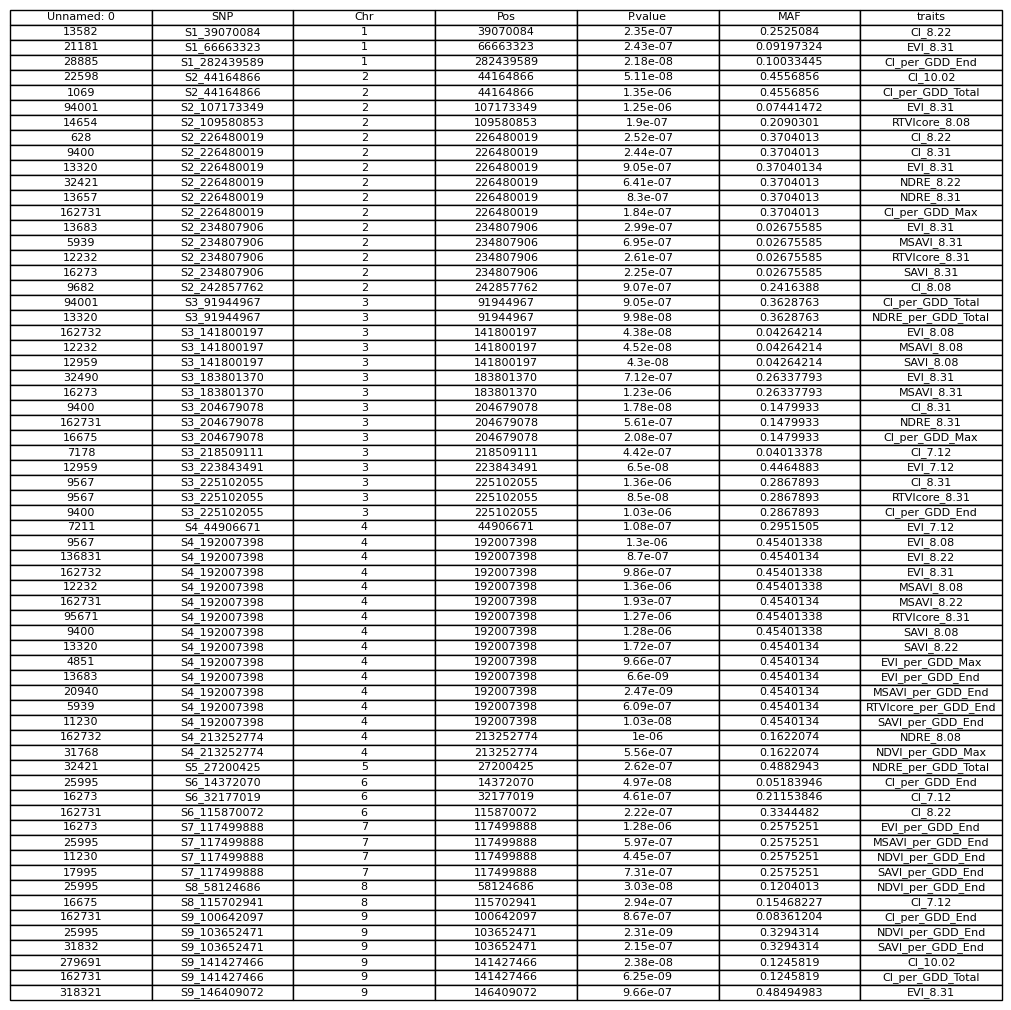

In [6]:
fig, ax = plt.subplots()

ax.axis('off')
ax.axis('tight')

BLINK_Table = ax.table(cellText=BLINK.values, colLabels=BLINK.columns, cellLoc='center', loc='center')

BLINK_Table.auto_set_font_size(False)
BLINK_Table.set_fontsize(8)
BLINK_Table.scale(2, 0.9)

fig.tight_layout

plt.savefig(r'C:\Users\Brent\Desktop\ClassNotes\CSS844\Project1\Figures\BLINK_Table.png', bbox_inches='tight')

plt.show()

After isolating the BLINK SNPs, this is the data we were left with.

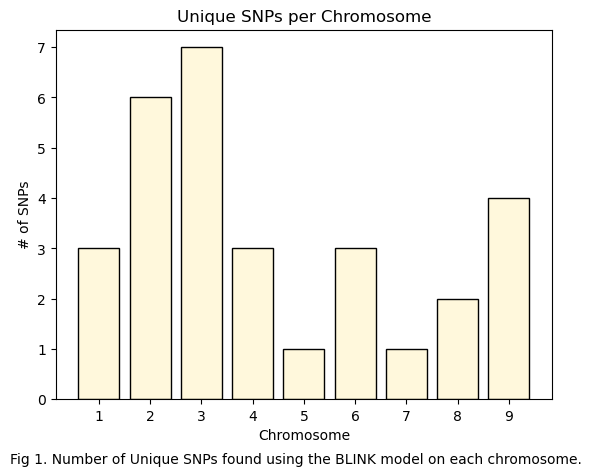

In [20]:
#SNPs per Chromosome
unique_snps = BLINK.drop_duplicates(subset='SNP')
snp_counts = unique_snps.groupby('Chr')['SNP'].count()

fig1_text = 'Fig 1. Number of Unique SNPs found using the BLINK model on each chromosome.'
fig1_text_wrapped = textwrap.fill(fig1_text, width=80)

plt.bar(snp_counts.index, snp_counts.values, color='cornsilk', edgecolor='black')

plt.xlabel('Chromosome')
plt.ylabel('# of SNPs')
plt.title('Unique SNPs per Chromosome')
plt.xticks(snp_counts.index)
plt.figtext(0.5, 0, fig1_text_wrapped, ha='center',va='top', fontsize=10, wrap=True )

plt.savefig(r'C:\Users\Brent\Desktop\ClassNotes\CSS844\Project1\Figures\Unique_SNPs_per_Chromosome.png', bbox_inches='tight')

plt.show()

This graph shows us how many unique SNPs were significant on each chromosome. Chromosomes 2 and 3 have noticably more, with 1, 4, 6, and 9 following behind, and 5, 7, and 8 having only 1 or 2. 

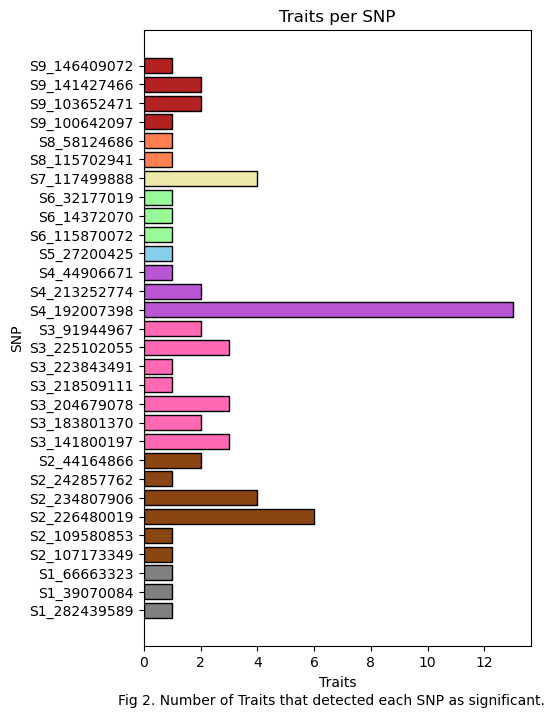

In [8]:
#Traits per SNP
SNP_VI_counts = BLINK.groupby('SNP')['traits'].count()

fig2_text = 'Fig 2. Number of Traits that detected each SNP as significant.'
fig2_text_wrapped = textwrap.fill(fig2_text, width=80)

plt.figure(figsize=(5, 8))

colors2 = ['firebrick' if 'S9' in SNP else
          'coral' if 'S8' in SNP else 
          'palegoldenrod' if 'S7' in SNP else
          'palegreen' if 'S6' in SNP else
          'skyblue' if 'S5' in SNP else
          'mediumorchid' if 'S4' in SNP else
          'hotpink' if 'S3' in SNP else
          'saddlebrown' if 'S2' in SNP else
          'gray' for SNP in SNP_VI_counts.index]

plt.barh(SNP_VI_counts.index, SNP_VI_counts.values, color=colors2, edgecolor='black')

plt.xlabel('Traits')
plt.ylabel('SNP')
plt.title('Traits per SNP')
plt.yticks(SNP_VI_counts.index)
plt.figtext(0.5, 0.05, fig2_text_wrapped, ha='center',va='top', fontsize=10, wrap=True )

plt.savefig(r'C:\Users\Brent\Desktop\ClassNotes\CSS844\Project1\Figures\VIs_per_SNP.png', bbox_inches='tight')

plt.show()

We then wondered how many traits picked up each SNP. Most were only picked up by 1-2 traits, with some extreme outliers like S4_192007398 being detected by 13!

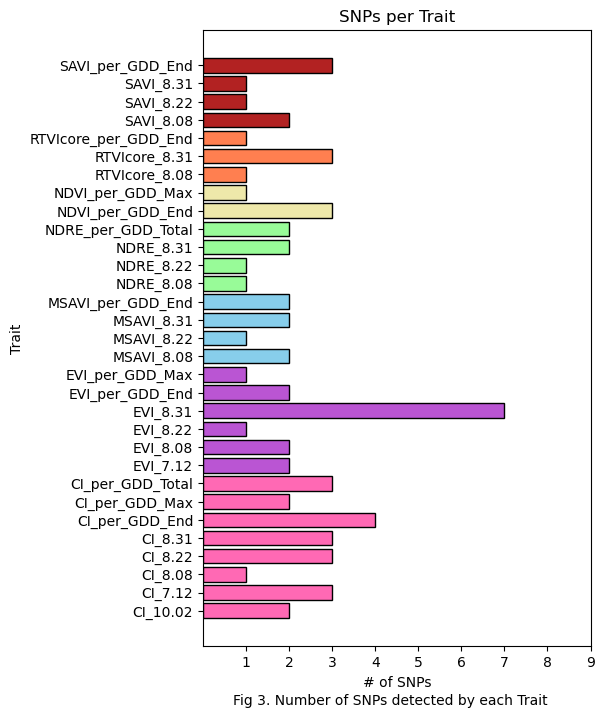

In [9]:
#SNPs per VI
VI_snp_counts = BLINK.groupby('traits')['SNP'].count()

fig3_text = 'Fig 3. Number of SNPs detected by each Trait'
fig3_text_wrapped = textwrap.fill(fig3_text, width=80)

plt.figure(figsize=(5, 8))

colors = ['skyblue' if 'MSAVI' in traits else
          'firebrick' if 'SAVI' in traits else 
          'coral' if 'RTVIcore' in traits else
          'palegoldenrod' if 'NDVI' in traits else
          'palegreen' if 'NDRE' in traits else
          'mediumorchid' if 'EVI' in traits else
          'hotpink' for traits in VI_snp_counts.index]

plt.barh(VI_snp_counts.index, VI_snp_counts.values, color=colors, edgecolor='black')

plt.xlabel('# of SNPs')
plt.ylabel('Trait')
plt.title('SNPs per Trait')
plt.xticks(snp_counts.index)
plt.figtext(0.5, 0.05, fig3_text_wrapped, ha='center',va='top', fontsize=10, wrap=True )

plt.savefig(r'C:\Users\Brent\Desktop\ClassNotes\CSS844\Project1\Figures\SNPs_per_VI.png', bbox_inches='tight')

plt.show()

We then checked the inverse of how many SNPs each VI detected, to see if any VIs significantly outperformed others. EVI and CI were the clear winners here.

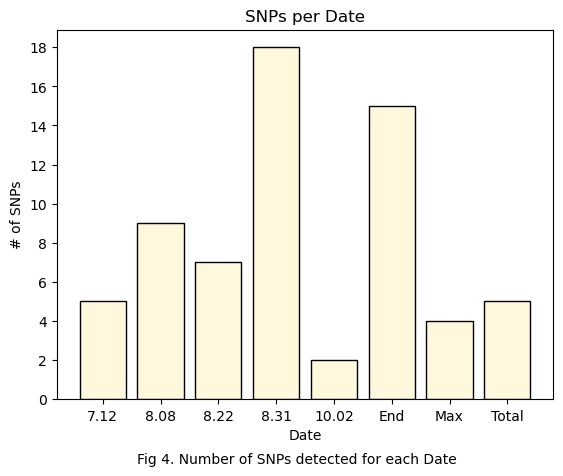

In [10]:
#SNPs per Date
BLINK['Date'] = BLINK['traits'].str.extract(r'(\d{1,2}\.\d{1,2}|Max|End|Total)')

Date_snp_counts = BLINK.groupby('Date')['SNP'].count()

numeric_traits = Date_snp_counts[Date_snp_counts.index.str.match(r'^\d{1,2}\.\d{1,2}$')]
non_numeric_traits = Date_snp_counts[~Date_snp_counts.index.str.match(r'^\d{1,2}\.\d{1,2}$')]

sorted_numeric_traits = numeric_traits.sort_index()

date_10_02 = sorted_numeric_traits[sorted_numeric_traits.index == '10.02']
other_sorted_dates = sorted_numeric_traits[sorted_numeric_traits.index != '10.02']

sorted_dates_with_10_02 = pd.concat([other_sorted_dates, date_10_02])

Date_snp_counts_reordered = pd.concat([sorted_dates_with_10_02, non_numeric_traits])

fig4_text = 'Fig 4. Number of SNPs detected for each Date'
fig4_text_wrapped = textwrap.fill(fig4_text, width=80)

plt.bar(Date_snp_counts_reordered.index, Date_snp_counts_reordered.values, color='cornsilk', edgecolor='black')

plt.xlabel('Date')
plt.ylabel('# of SNPs')
plt.title('SNPs per Date')

plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xticks(Date_snp_counts_reordered.index)

plt.figtext(0.5, 0, fig4_text_wrapped, ha='center',va='top', fontsize=10, wrap=True )

plt.savefig(r'C:\Users\Brent\Desktop\ClassNotes\CSS844\Project1\Figures\SNPs_per_Date.png', bbox_inches='tight')

plt.show()

In [4]:
Effects = pd.read_csv(r'C:\Users\Brent\Desktop\ClassNotes\CSS844\Project1\SNP_Effect_Values.csv')
print(Effects)

             SNP  Chr        Pos       P.value       MAF  nobs  H&B.P.Value  \
0   S1_282439589    1  282439589  2.180000e-08  0.100334   598     0.000771   
1    S1_39070084    1   39070084  2.350000e-07  0.252508   598     0.002977   
2    S1_66663323    1   66663323  2.430000e-07  0.091973   598     0.005292   
3   S2_107173349    2  107173349  1.250000e-06  0.074415   598     0.006308   
4   S2_109580853    2  109580853  1.961680e-03  0.209030   598     0.616227   
..           ...  ...        ...           ...       ...   ...          ...   
60  S9_103652471    9  103652471  2.310000e-09  0.329431   598     0.000082   
61  S9_103652471    9  103652471  2.150000e-07  0.329431   598     0.003814   
62  S9_141427466    9  141427466  2.380000e-08  0.124582   598     0.000842   
63  S9_141427466    9  141427466  6.250000e-09  0.124582   598     0.000222   
64  S9_146409072    9  146409072  9.660000e-07  0.484950   598     0.005826   

      Effect            traits  
0  -0.000568    CI

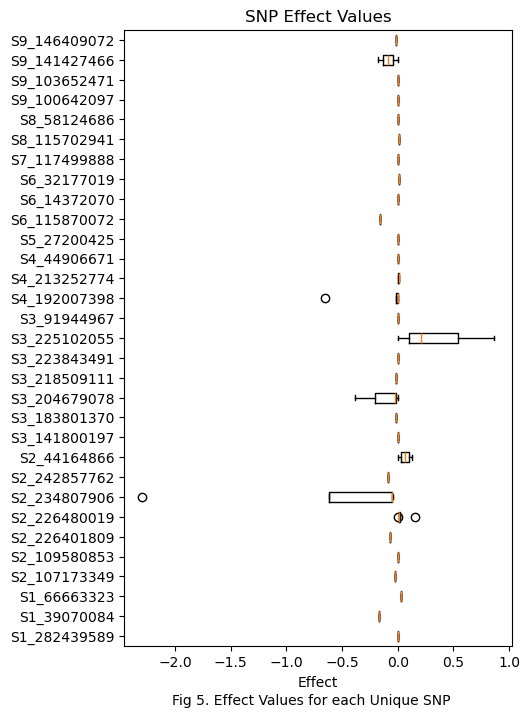

In [19]:
#Effects Box & Whisker
grouped_Effects = [Effects[Effects['SNP'] == snp]['Effect'].values for snp in Effects['SNP'].unique()]

fig5_text = 'Fig 5. Effect Values for each Unique SNP'
fig5_text_wrapped = textwrap.fill(fig5_text, width=80)

plt.figure(figsize=(5,8))

plt.boxplot(grouped_Effects, vert=False)

plt.yticks(range(1, len(Effects['SNP'].unique()) + 1 ), Effects['SNP'].unique())
plt.xlabel('Effect')
plt.title('SNP Effect Values')

plt.figtext(0.5, 0.05, fig5_text_wrapped, ha='center',va='top', fontsize=10, wrap=True )

plt.savefig(r'C:\Users\Brent\Desktop\ClassNotes\CSS844\Project1\Figures\SNP_Effect_Values.png', bbox_inches='tight')

plt.show()

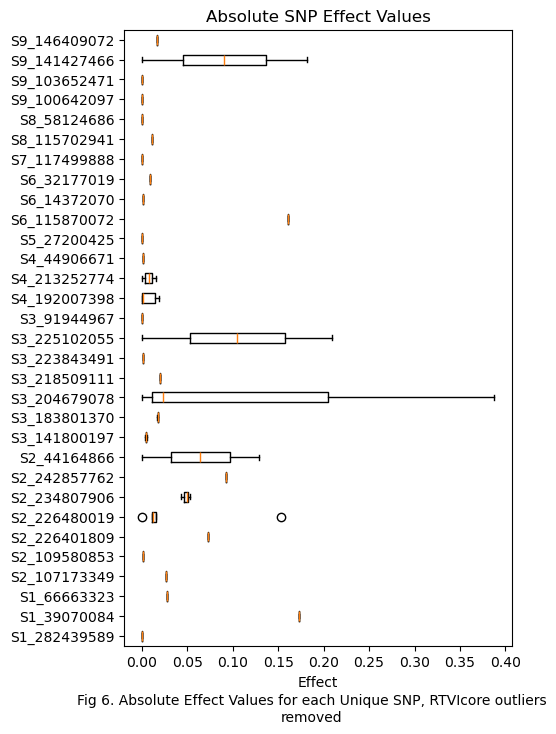

In [23]:
#Effects Box & Whisker FIXED
Abs_Effects = Effects
Abs_Effects['Effect'] = Abs_Effects['Effect'].abs()

Abs_Effects = Abs_Effects[Abs_Effects['traits'] != 'RTVIcore_8.31']

grouped_Abs_Effects = [Abs_Effects[Abs_Effects['SNP'] == snp]['Effect'].values for snp in Effects['SNP'].unique()]

fig6_text = 'Fig 6. Absolute Effect Values for each Unique SNP, RTVIcore outliers removed'
fig6_text_wrapped = textwrap.fill(fig6_text, width=80)

plt.figure(figsize=(5,8))

plt.boxplot(grouped_Abs_Effects, vert=False)

plt.yticks(range(1, len(Abs_Effects['SNP'].unique()) + 1 ), Abs_Effects['SNP'].unique())
plt.xlabel('Effect')
plt.title('Absolute SNP Effect Values')

plt.figtext(0.5, 0.05, fig6_text_wrapped, ha='center',va='top', fontsize=10, wrap=True )

plt.savefig(r'C:\Users\Brent\Desktop\ClassNotes\CSS844\Project1\Figures\Abs_SNP_Effect_Values.png', bbox_inches='tight')

plt.show()

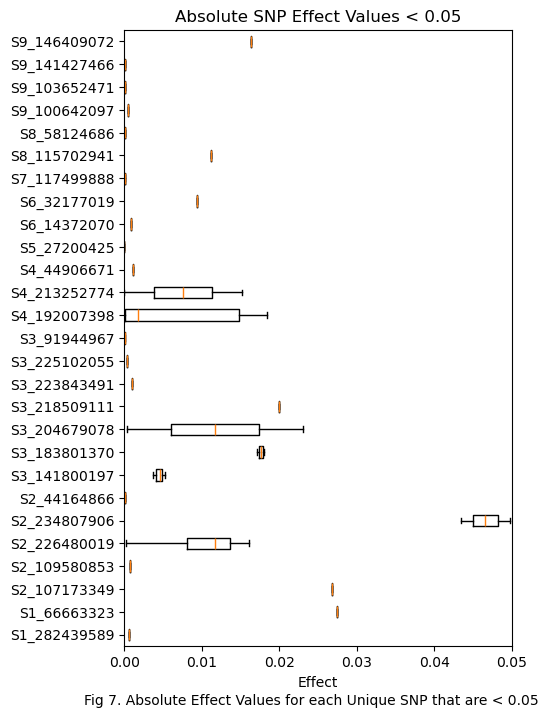

In [ ]:
#Effects Box & Whisker FIXED AND SHORTENED
Abs_Effects = Effects
Abs_Effects['Effect'] = Abs_Effects['Effect'].abs()

Abs_Effects = Abs_Effects[Abs_Effects['traits'] != 'RTVIcore_8.31']
Abs_Effects = Abs_Effects[Abs_Effects['Effect'] <= 0.05]

grouped_Abs_Effects = [
    Abs_Effects[Abs_Effects['SNP'] == snp]['Effect'].values 
    for snp in Effects['SNP'].unique()]

grouped_Abs_Effects = [group for group in grouped_Abs_Effects if len(group) > 0]

remaining_snps = Abs_Effects['SNP'].unique()

fig7_text = 'Fig 7. Absolute Effect Values for each Unique SNP that are < 0.05'
fig7_text_wrapped = textwrap.fill(fig7_text, width=80)

plt.figure(figsize=(5,8))

plt.boxplot(grouped_Abs_Effects, vert=False)

plt.xlim(0, 0.05)
plt.yticks(range(1, len(remaining_snps) +1), remaining_snps)
plt.xlabel('Effect')
plt.title('Absolute SNP Effect Values < 0.05')

plt.figtext(0.5, 0.05, fig7_text_wrapped, ha='center',va='top', fontsize=10, wrap=True )

plt.savefig(r'C:\Users\Brent\Desktop\ClassNotes\CSS844\Project1\Figures\Abs_SNP_Effect_Values_Short.png', bbox_inches='tight')

plt.show()